In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

###Linear Regression

1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [3]:
data_x,data_y = np.loadtxt('linear.txt')

2) Plot `data_x` vs `data_y`

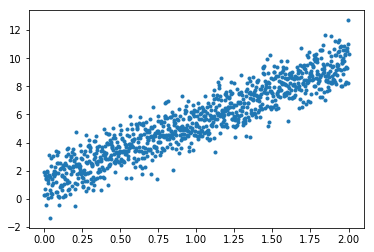

In [4]:
plt.plot(data_x,data_y,'.')

3) What what is the equation for a striaght line?

In [5]:
def f(x,B):
    return B[0][0]*x+B[1][0]

4) What is the difference between a "good line" and a "bad line"?

5) What are we trying to adjust to minimize the $\chi^2$?

6) How do we findind the minimum of $\chi^2$? Whare are they?

In [6]:
sum(data_x**2)

1334.0006673340004

7) Find the best slope and the best intercept.

In [7]:
def f_eli(A_in,B_in):
    A = np.copy(A_in)
    B = np.copy(B_in)
    
    n = A.shape[0]
    for i in range(n):
        for j in range(i+1,n):
            c = A[j][i]/A[i][i]
            
            A[j][:] = A[j][:] - c*A[i][:]
            B[j] = B[j] - c*B[i]
        B[i] = B[i]/A[i][i]   
        A[i][:] = A[i][:]/A[i][i]

                  
    return A,B

def b_eli(A_in, B_in):
    A = np.copy(A_in)
    B = np.copy(B_in)
    
    n = A.shape[0]
    for i in range(n-1,-1,-1):
        for j in range(i-1,-1,-1):
            
            B[j] = B[j] - B[i]*A[j][i]
            A[j] = A[j] - A[i]*A[j][i]
           
            
    return A,B

In [8]:
A = np.array([
    [sum(data_x**2), sum(data_x)],
    [sum(data_x), data_x.shape[0]]
])
B = np.array([
    [sum(data_x*data_y)],
    [sum(data_y)]
             
])

In [9]:
a,b=f_eli(A,B)
a,b=b_eli(a,b)
print(a)
print(b)

[[  1.00000000e+00   0.00000000e+00]
 [ -4.54065911e-16   1.00000000e+00]]
[[ 4.30805437]
 [ 1.19580916]]


In [10]:
def f(x,B):
    return B[0][0]*x+B[1][0]

8) Plot the line along with the data point to verify that you actually got the right answer.

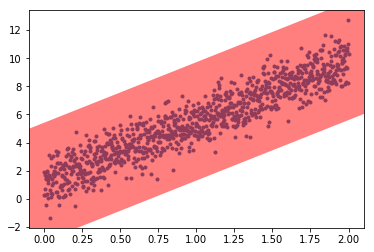

In [11]:
plt.plot(data_x,data_y,'.')

plt.plot(data_x,[f(x,b) for x in data_x],color = "red",linewidth =110, alpha = 0.5)

9) What is your prediction for the value of `y` when `x`=3.0?

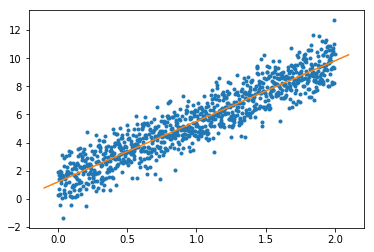

In [12]:
f(3,b)
plt.plot(data_x,data_y,'.')
plt.plot([-0.1,2.1],[f(x,b) for x in [-0.1,2.1]])

###Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

In [13]:
xs,ys = np.loadtxt('parabola.txt')

2) What is the general form for parabola?

In [14]:
def f(x,b):
    return b[0][0]*x**2 + b[1][0]*x + b[2][0]

3) What is the difference between a "good line" and a "bad line"?

4) What are we trying to minimize in order to find the best parabola?

5) Find the best fitted parabola and plot to verify.

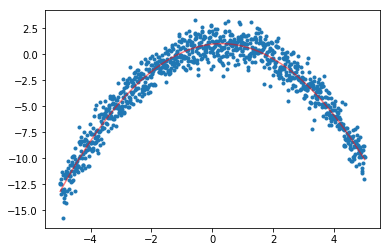

In [15]:
plt.plot(xs,ys,'.')
A = np.array([
    [sum(xs**4),sum(xs**3),sum(xs**2)],
    [sum(xs**3),sum(xs**2),sum(xs)],
    [sum(xs**2),sum(xs),xs.shape[0]]
    
])
B = np.array([
    [sum(ys*xs**2)],
    [sum(ys*xs)],
    [sum(ys)]
])
b = np.linalg.solve(A,B)

def f(x,b):
    return b[0][0]*x**2 + b[1][0]*x + b[2][0]
plt.plot(xs,[f(x,b) for x in xs], color = "red",alpha = 0.5)

###Extra

Find something interesting from http://www.stat.ufl.edu/~winner/datasets.html and make some prediction.